# 통계 기본 
#### EDA를 위한 pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import tmean, scoreatpercentile
import seaborn as sns
import os
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv('Pre_Season_Batter.csv')

In [3]:
# df_1
df_1.head(5)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


<br>
##  데이터 명세 
<br> 
* batter_id  : 타자의 고유 아이디 <br>
* batter_name :  타자 이름 <br>
* year : 년도 <br>
* team : 소속팀 <br>
* avg : 타율 <br>
* G : 출전게임수 <br>
* AB : 타수(타석-볼넷-사구-희생번트-희생플라이) <br>
* R : 득점 <br>
* H : 안타(1,2,3,홈런) <br>
* 2B ,3B, HR : 2루타,3루타,홈런 <br>
* TB : 루타 수 <br>
* RBI : 타점 <br>
* SB : 도루성공 <br>
* CS : 도루실패 <br>
* BB : 볼넷 <br>
* HBP : 사구(몸에 맞는 볼) <br>
* SO : 삼진아웃 <br>
* GDP : 병살타 <br>
* SLG : 장타율 <br>
* OBP : 출루율 <br>
* E : 에러 <br>
* height/weight : 키/몸무게 <br>
* year_born : 생년월일 <br>
* position : 수비위치 <br>
* career : 선수 커리어 <br>
* starting_salary : 입단연봉 <br>
* OPS : (OBP + SLG ) <br>

<br>
## 데이터 탐색
<br>

__feature(열) ,  record(행)으로 이루어진 2차원 테이블 형태__

<br>
### 1. 위치추정
<br>

> 각 feature(변수)의 대푯값(typical value)을 구하기 <br>
> "대부분의 값이 어디에 위치하는가 <b>중심경향성</b>을 나타내는 측정지표

<br>
#### 1.1 평균(mean)과 절사평균(trimmed mean)
<br>
> "평균"은 전체값의 총합을 전체개수로 나눈 값이다. "절사평균"은 값들을 크기 순으로 정렬한 후 양끝에서 일정 개수의 값을 제거한 뒤 <br>
남은 값들을 가지고 평균을 구하는 방식이다. 따라서 "절사평균"은 극단값의 영향을 제거할 수 있는 방법이다. <br>

In [24]:
#  일반적인 평균값 구하기
df_1['AB'].mean()

19.201722900215362

In [28]:
# 절사평균을 구하기 위한 함수만들기
# 단, 이 함수의 경우 최대,최소값들의 중복여부를 고려하지 않음
def trim_mean(arr, percent):
    lower_limit = scoreatpercentile(arr, percent)
    upper_limit = scoreatpercentile(arr, 100-percent)
    return tmean(arr, limits=(lower_limit, upper_limit), inclusive=(False, False))

my_result = trim_mean(df_1['AB'].values,10)

In [21]:
my_result

18.27420814479638

<br> 
#### 1.2 가중평균(weighted average)
<br>
> 각 데이터값에 가중치(w)를 곱해준 후 평균을 구하는 방법 <br>
> 데이터를 크기순으로 정렬 후 가중치 부여<br>
* 어떤 값들이 본래 다른 값들에 비해 큰 변화량을 갖는다면 해당 관측값에 더 작은 가중치를 줄 수 있다.<br>
* 항상 정확히 비교가능한 관측값이 얻어지지 않으므로, 관측치가 더 적은 데이터에 가중치를주는 방법
<br>
> 평균 외에 '중간값'(=데이터를 일렬로 정렬했을때 한가운데에 위치하는 값)을 활용할 수 있다. <br>
> 중간값 또한 가중중간값을 가지며, <b>특잇값에 로버스트하다.</b>

In [18]:
# Groupby 활용 가중평균 구하기
# df_2 = pd.DataFrame({'grp_col' : ['a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b'], 
#                         'val' : np.arange(10)+1,'weight' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.0, 0.1, 0.2, 0.3, 0.4]})

# 가중평균 함수 만들기
weighted_avg_func = lambda x : np.average(x['val'], weights=x['weight'])

grouped = df_2.groupby('grp_col')
grouped.apply(weighted_avg_func)


#  비교
# df2_avg = df_2.groupby('grp_col').mean()
# df2_avg 

# 함수지정 없이 lambda만 사용
# grouped.apply(lambda x:np.average(x['val'],weights=x['weight']))

grp_col
a    4.0
b    9.0
dtype: float64

<br>
* **예제** 
<br>
#### 인구에 따른 살인비율의 위치추정


In [3]:
state = pd.read_csv('state.csv')

In [26]:
#인구평균
state_mean = state['Population'].mean()
state_mean

6162876.3

In [30]:
#절사평균 (trimmed => 0.1)

state_trimmedAvg = trim_mean(state['Population'].values,10)
state_trimmedAvg

4783697.125

In [33]:
#중간값
state_median = state['Population'].median()
state_median

4436369.5

In [29]:
# 가중평균
grouped_state = state.groupby('State')

state_weightAvg = grouped_state.apply(lambda x : np.average(x['Murder.Rate'],weights=x['Population']))
state_weightAvg.head(5)

State
Alabama       5.7
Alaska        5.6
Arizona       4.7
Arkansas      5.6
California    4.4
dtype: float64

<br>
## 2. 변이 추정
<br>

> 'variability' <br>
>  데이터값이 얼마나 밀집 혹은 퍼져 있는지를 나타내는 산포도(dispersion)  <br>

<br>

* **편차(deviation)**
* **분산(variance)**
* **표준편차(standard deviation)**
* **범위(range)**
* **순서통계량(order statistics)**
* **백분위수**
* **사분위수**

<br>
#### 2.1 표준편차
<br>

> 관측 데이터와 위치 추정값 사이의 차이 => '편차' <br>
> 데이터가 중앙값을 주변으로 얼마나 퍼져 있는가 <br>
> 편차의 절대값의 평균(음의 편차 고려) => 평균절대편차 <br>
> 분산(제곱편차의 평균) 표준편차(분산의 제곱근)
<br><br> 

* **분산,표준편차,평균절대편차 모두 특잇값에 로버스트하지 않다** 
* **분산,표준편차는 제곱 편차를 사용하기 때문에 특잇값에 민감**

In [6]:
# Object to float
pd.to_numeric(df_1['avg'], errors='coerce')
df_1['avg_float'] = pd.to_numeric(df_1['avg'],errors='coerce')

# 전체 avg 평균 반올림하여 출력
round(df_1['avg_float'].mean(), 3)

0.244

In [87]:
# avg 표준편차
# axis = 0 => 열기준 , default
# print(df_1['avg_float'].std(axis=0))

# avg 분산
# print(df_1['avg_float'].var(axis=0))

0.01973033147296696


<br>
#### 2.1 MAD
<br>

> 중위절대편차 , Median Absolute Deviation <br>
> 로버스트한 추정법 <br>
1. 표본데이터에서 중위수를 구한다 (x1,x2,x3,... => m)
2. 각 데이터에서 중위수를 뺀다( (x1-m),(x2-m),(x3-m),...) 
3. 2번의 각 결과들을 절대값으로 바꾼 후 중위값을 구한다

In [24]:
# 패키지 불러오기
# MAD 
from statsmodels import robust

robust.mad(state['Population'], axis=0)


3849876.1459979336

<br>
#### 2.3 백분위수 추정
<br>

> 정렬된(순위) 데이터가 얼마나 퍼져있는지를 보는것 <br>
> 순서통계량 <br>
> 가장 큰값과 작은값의 차이를 나타내는 범위에 기준 단, 범위는 특잇값에 매우 민감하기때문에 변위측정에 불리하다 <br>
<br> 
> 로버스트한 순서통계량 변위추정을 위해 범위의 양끝에서 값들을 지운 후 추정 => 백분위수 <br>
> **IQR(사분위범위)** => 25번째 백분위수와 75번째 백분위수의 차이를 보는것

<br>
* **예제**
<br>
#### 주별 인구의 변위 추정

In [39]:
# 주별 Group
grouped_state

# 표준편차 추정
print(state['Population'].std(axis=0))

# 사분위범위(IQR) 추정
## 사분위수 구하기 => .quantile()
Q1 = state['Population'].quantile(0.25)
Q3 = state['Population'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# MAD(중위절대편차) 추정
print(robust.mad(state['Population'],axis=0))

## 표준편차과 중위절대편차의 차이가 2배가까이 난다. 즉, 표준편차는 로버스트하지 않다.

6848235.347401142
4847308.0
3849876.1459979336


<br>
## 3. 데이터 분포
<br>

#### 3.1 백분위수 boxplot

In [51]:
state['Population'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64

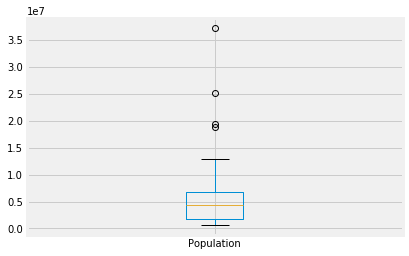

In [63]:
state.boxplot(column=['Population'])
plt.show()

<br>
#### 3.2 도수분포표 히스토그램
<br>

> 도수분포표 => 변수의 범위를 동일한 크기의 구간으로 나눈 후, 구간마다 몇개의 변수값이 존재하는가를 나타냄 <br> 
> 비어있는 구간을 살펴보거나, 구간의 크기를 바꿔보며 유용한 정보를 찾아 낼 수 있음 <br>
> 도수분포표 시각화 => 히스토그램 <br>
> 히스토그램의 막대사이에 빈공간이 있다는것은 해당구간에 값이 존재하지않는다는것이며 이는 중요한 정보를 나타낼수도 있다

In [5]:
#주별 인구 도수분포표

# 도수,구분 = np.histogram(data,도수분포구간)
# 도수 : 도수분포표의 각 구간 data 수 
# 구분 : 도수분포 구간

# 구간범위 정하기
bins = int((state['Population'].max() - state['Population'].min()) /10) # (범위최대값 - 범위최소값) / 10 (10개구간으로 나누고자 할경우)

# 도수분포 구하기
hist,bins = np.histogram(state.groupby('Abbreviation')['Population'].sum(),bins)  # hist = 도수, bins = 구분
print(hist)
print(bins)

# 히스토그램 그리기
# ???
# plt.hist(state.groupby('Abbreviation')['Population'].sum(),bins)


[1 0 0 ... 0 0 1]
[  563626.   563636.   563646. ... 37253936. 37253946. 37253956.]


In [7]:
data_url = 'http://bit.ly/2cLzoxH'  # 외부 데이터 가져오기
his_data = pd.read_csv(data_url)
his_data.head(5)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


(Text(0.5,0,'lifeExp'), Text(0,0.5,'frequency'))

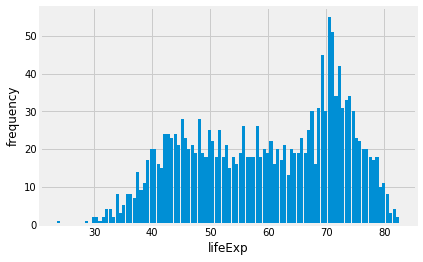

In [14]:
his_data['lifeExp'].hist(bins=100,histtype='bar',rwidth=0.9)
plt.xlabel('lifeExp'),plt.ylabel('frequency')

<br>
#### 3.3 이진 데이터와 범주형 데이터 
<br>

> 범주형 데이터에서는 비율,퍼센트를 활용한다 <br>

* 최빈값
<br>
* **기댓값** <br>
 => 어떠한 목적(상업적)을 위해 하나의 '기댓값'을 도출해 낼 수 있다 <br>
 => 기댓값은 가중평균과 같은 꼴이다 <br>
 => 어떤값과 그 값이 일어날 확률을 서로 곱해 더한 값을 의미한다 : EV=(0.05)(300) +(0.15)(50)+(0.8)(0) = 22.5

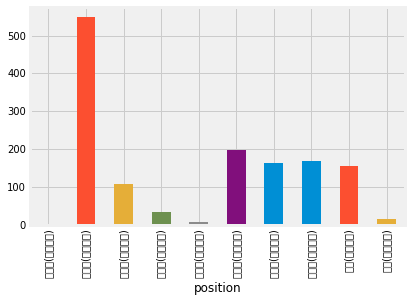

In [34]:
## 범주형 데이터로 변환
# df_1['position'].astype('category')

## 카테고리별 갯수를 counting 해준 뒤 시각화
df_1.groupby('position')['position'].count().plot(kind='bar')

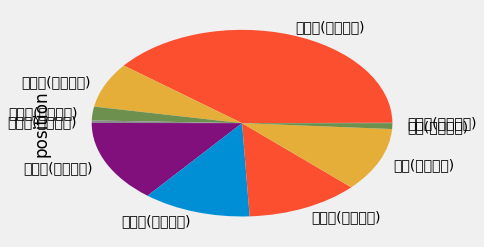

In [58]:
df_1.groupby('position')['position'].count().plot(kind='pie')

<br>
#### 3.4 상관계수
<br>

> 예측값과 목표값과의 상관계수 <br>
> 변수간의 한 변수의 변화에 따른 변수의 변화 정도와 방향을 예측하는 분석기법 <br>
> <b> 변수간의 인과관계를 나타내는 것이 아니며 변수간의 관련성을 파악하기 위한 용도로 사용 </b> <br> 
> 상관계수는 -1 ~ 1 사이의 값을 가지며, 연속형데이터에 대해서 적용한다 


In [5]:
## 연속형 변수 추출
state_cor = state[['Population','Murder.Rate']]

## 인구수와 살인비율의 상관계수
state_cor.corr()

,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


In [6]:
## 방법2
state['Population'].corr(state['Murder.Rate'])

0.1820693429486802

In [7]:
## 야구 데이터 상관계수 분석
df_1_corr = df_1[['year','G','AB','R','H','2B','3B','HR','TB','RBI','SB','CS','BB','HBP','SO','GDP']]

## 상관계수 행렬
df_1_matrix = df_1_corr.corr().head(5)
df_1_matrix.head(5)

,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP
year,1.000000,-0.052724,-0.124997,-0.037957,-0.061322,-0.071173,0.033396,-0.030596,-0.059349,-0.038890,-0.094197,-0.021085,-0.055295,-0.046607,-0.096983,-0.066485
G,-0.052724,1.000000,0.740827,0.681357,0.637177,0.380824,0.256658,0.209911,0.584077,0.460391,0.333558,0.223256,0.419496,0.201577,0.599578,0.258046
AB,-0.124997,0.740827,1.000000,0.747165,0.890546,0.589264,0.286405,0.374816,0.846330,0.664648,0.362959,0.240986,0.569244,0.216046,0.735374,0.386200
R,-0.037957,0.681357,0.747165,1.000000,0.783290,0.513408,0.282079,0.451541,0.788865,0.608705,0.443408,0.224133,0.534037,0.214750,0.523556,0.229514
H,-0.061322,0.637177,0.890546,0.783290,1.000000,0.660301,0.285611,0.417939,0.944901,0.719841,0.358165,0.234635,0.509061,0.184500,0.559126,0.329099


In [11]:
## 하나의 변수와 나머지 변수와의 상관관계 분석
df_1.corrwith(df_1['OPS'])

batter_id   -0.067036
year         0.051496
G            0.058661
AB           0.148324
R            0.301075
H            0.397155
2B           0.307295
3B           0.117101
HR           0.394804
TB           0.464214
RBI          0.378170
SB           0.063304
CS           0.042884
BB           0.201346
HBP          0.079176
SO           0.015086
GDP          0.042631
SLG          0.961944
OBP          0.865307
E            0.014341
OPS          1.000000
dtype: float64

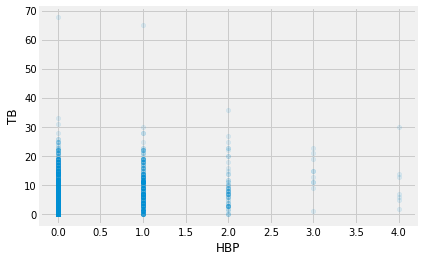

In [19]:
from pandas.plotting import scatter_matrix
 
## 산점도 전체 보기
# attributes = ["OPS", "HBP", "SLG", "OBP"]
# scatter_matrix(df_1[attributes], figsize=(12, 8))

## 특정 산점도 확대
df_1.plot(kind="scatter", x="HBP", y="TB", alpha=0.1)

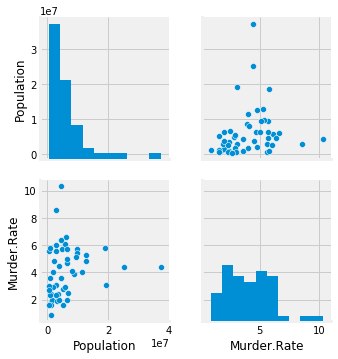

In [21]:
# scatterplot matrix with histogram only for continuous variables
# seaborn 활용 산점도
sns.pairplot(state, diag_kind='hist')  # 대각선 그림은 히스토그램으로

plt.show()

<br>
## 4. 두 개 이상의 변수 탐색
<br>

>일변량 분석 : 평균,분산 <br> 
>이변량 분석 : 상관분석 <br> 
>다변량 분석

## <br>
#### 4.1 육각형 구간과 등고선
<br>

> 수치형 변수 대 수치형 변수를 시각화 <br>
> 산점도의 경우 레코드가 수십,수백만에 이를 경우 데이터가 너무 밀집되어 알아보기 어렵다

In [119]:
kc_tax = pd.read_csv("kc_tax.csv")


# ## 특잇값 제거
kc_tax['TaxAssessedValue'] = kc_tax[kc_tax.TaxAssessedValue < 750000]
kc_tax['SqFtTotLiving']=kc_tax['SqFtTotLiving'][kc_tax['SqFtTotLiving'] >100]  ## 이 코드로 해야함. 아래코드랑 무슨차이????
# kc_tax['SqFtTotLiving'] = kc_tax[(kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving<3500)]

kc_tax_hexbin = kc_tax[['TaxAssessedValue','SqFtTotLiving']]
kc_tax_hexbin.corr()

,TaxAssessedValue,SqFtTotLiving
TaxAssessedValue,1.000000,0.541982
SqFtTotLiving,0.541982,1.000000


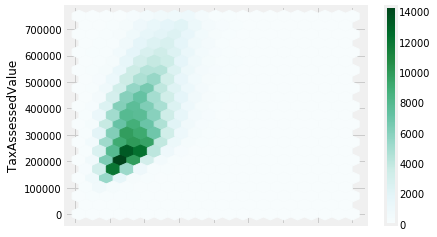

In [5]:
ax = kc_tax_hexbin.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=20)

<br>
#### 4.2 분할표
<br>

> 범주형데이터 대 범주형데이터 비교 <br>
> 교차표(cross table) 이용

In [8]:
lc_loans = pd.read_csv('lc_loans.csv')

## ['grade'] 값을 조건에 맞게 category형으로 치환
def grade_category(lc_loans) :
    if  lc_loans['grade'] >= 7 :
        return 'A'
    elif lc_loans['grade'] >= 6 :
        return 'B'
    elif lc_loans['grade'] >= 5 :
        return 'C'
    elif lc_loans['grade'] >= 4 :
        return 'D'
    elif lc_loans['grade'] >= 3 :
        return 'E'
    elif lc_loans['grade'] >= 2 :
        return 'F'
    else :
        return 'G'


In [9]:
## 함수적용
lc_loans['grade'] = lc_loans.apply(grade_category, axis=1)

In [14]:
## grade 기준 crosstab 생성
loans_crosstab = pd.crosstab(lc_loans.grade,lc_loans.status, margins=True)

In [15]:
loans_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,549,14864,5362,184,20959
B,2178,52311,20647,741,75877
C,5263,92603,29376,2171,129413
D,5720,80967,21390,2619,110696
E,4651,48730,12478,2162,68021
F,2599,22190,5363,1187,31339
G,1711,9520,2700,725,14656
All,22671,321185,97316,9789,450961


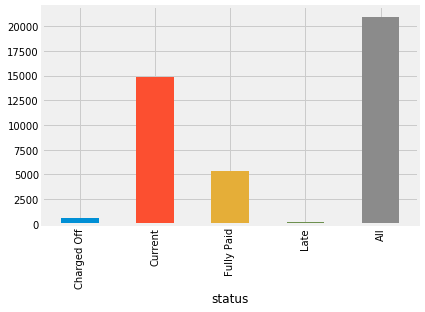

In [20]:
## 빈도수 시각화 1.
loans_crosstab.loc['A',].plot(kind='bar')

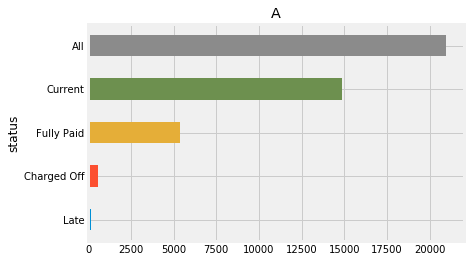

In [23]:
## 빈도수 시각화 2. (내림차순)
loans_crosstab2=loans_crosstab.loc['A',].sort_values().plot(kind='barh',title='A')

<br>
#### 4.3 범주형 변수 대 수치형 변수
<br>

> 범주형 변수에 따라 분리 된 수치형 변수의 분포를 살펴본다 <br> 
> boxplot , 바이올린 도표 활용 <br>

In [ ]:
airline_delay = pd.read_csv('airline_stats.csv')

### boxplot 실행 시 AttributeError: 'Series' object has no attribute 'boxplot' 에러가 뜨는 경우
<br>

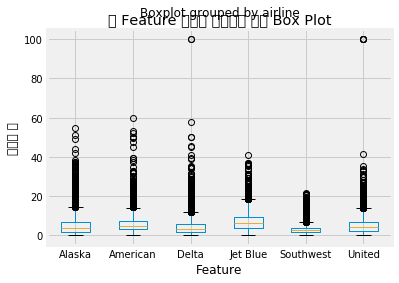

In [46]:
## 항공기 사고에 따른 비행사별 항공 지연 비율
## airline_delay['pct_atc_delay'].boxplot(by='airline')의 경우 series 에러 발생한다
airline_delay.boxplot(column='pct_atc_delay' , by='airline')
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()

<br>
#### 4.4 다변수 시각화 
<br>

> '조건화' 활용 <br>

In [121]:
kc_tax_selected.groupby('ZipCode').size()

ZipCode
98105.0    6501
98108.0    5606
98126.0    5822
98188.0    4109
dtype: int64

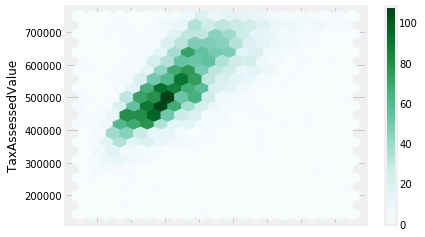

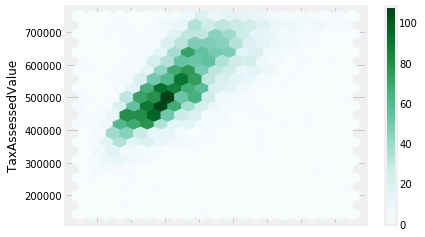

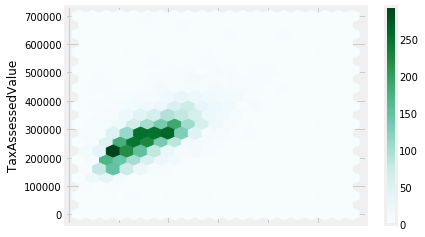

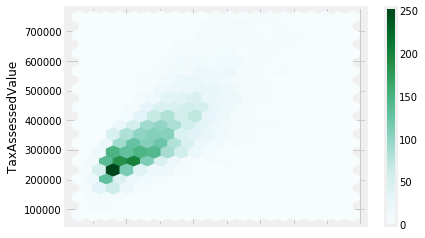

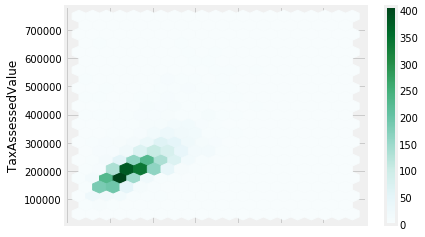

In [123]:
kc_tax['ZipCode'].astype('category')

## 특정 우편번호 추출
## and or 연산자 사용할 시 &,| 으로 할것
kc_tax_selected = kc_tax[(kc_tax.ZipCode== 98105) | (kc_tax.ZipCode == 98108) | (kc_tax.ZipCode == 98126) | (kc_tax.ZipCode == 98188)]

selected_hexbin = kc_tax_selected.groupby('ZipCode').plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=20)

## 특정 우편번호에 따른 평가액 비교 도식화
## 왜 5개?... 도표별 라벨 달기
